<IPython.core.display.Javascript object>


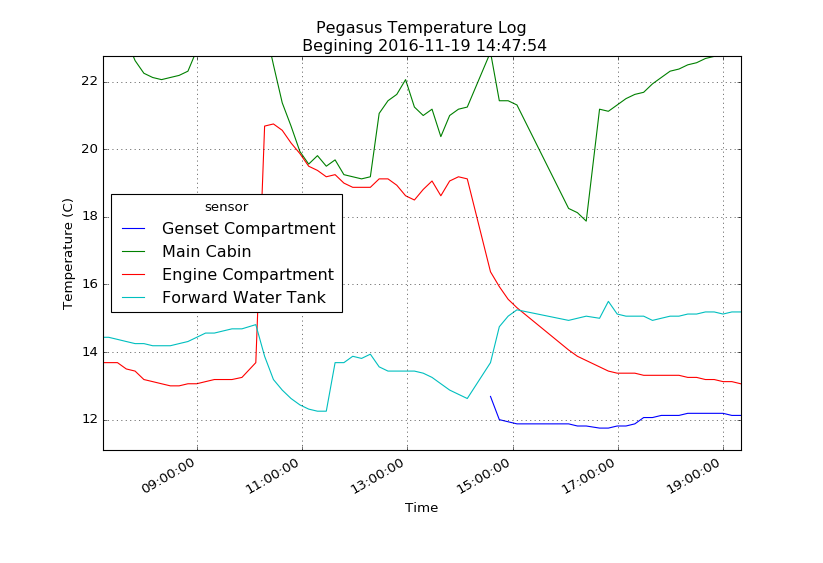

In [1]:
#Import Libraries
% matplotlib notebook
import numpy as np
from scipy import interpolate
import pandas as pd
from datetime import datetime

#---Data Source & Header info    
url = 'https://raw.githubusercontent.com/slawler/PegasusLogs/master/Temperature/Temperature.log'
cols = ['time','sensor', 'obs']    

df= pd.read_csv(url, header = None, sep = '\t' ,names = cols)

#Read & Format Data Table
def Observations_Table():
    df= pd.read_csv(url, header = None, sep = '\t' ,names = cols)
    df = df.pivot(index = 'time', columns='sensor', values='obs')
    df = df.set_index(pd.to_datetime(df.index,format = '%d.%Y.%m %H:%M:%S'))
    df.rename(columns ={3: 'Genset Compartment', 4: 'Main Cabin',
                        5: 'Engine Compartment',8:'Forward Water Tank'},inplace=True) 
    return df

#Plot Data
def Plot_Maker(df):
    import matplotlib.pyplot as plt
    fig = df.plot()
    plt.title('Pegasus Temperature Log'+ '\n Begining {}'.format(df.index[0]))
    plt.ylabel('Temperature (C)')
    plt.xlabel('Time')
    plt.grid(True)
    y_min = df.min().mean()*0.6
    y_max = df.max().mean()*1.8
    plt.ylim((y_min,y_max))
    
df = Observations_Table()
p = Plot_Maker(df)
